![alt text](https://assets.bwbx.io/images/users/iqjWHBFdfxIU/iyZo9AeHC.WA/v1/-1x-1.webp)


### **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

### **Load The Data**


In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
df_submission = pd.read_csv('/content/sample_submission.csv')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [ ]:
df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


### **Data Preprocessing**

In [ ]:
df_train.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,5083
engine,0
transmission,0
ext_col,0
int_col,0


In [ ]:
duplicate_rows = df_train[df_train.duplicated()]

print(f"Duplicate Rows: {duplicate_rows}")

df_train = df_train.drop_duplicates()

Duplicate Rows: Empty DataFrame
Columns: [id, brand, model, model_year, milage, fuel_type, engine, transmission, ext_col, int_col, accident, clean_title, price]
Index: []


### *Handle Null Values*

In [ ]:
nulls_fuel_type = df_train[df_train['fuel_type'].isnull()]
print(nulls_fuel_type[['engine', 'fuel_type']])

                                             engine fuel_type
11              Electric Motor Electric Fuel System       NaN
32      518.0HP Electric Motor Electric Fuel System       NaN
51                            Dual Motor - Standard       NaN
52      518.0HP Electric Motor Electric Fuel System       NaN
161     670.0HP Electric Motor Electric Fuel System       NaN
...                                             ...       ...
188368                       Standard Range Battery       NaN
188455  480.0HP Electric Motor Electric Fuel System       NaN
188462  480.0HP Electric Motor Electric Fuel System       NaN
188484  534.0HP Electric Motor Electric Fuel System       NaN
188489  557.0HP Electric Motor Electric Fuel System       NaN

[5083 rows x 2 columns]


In [ ]:
df_train['fuel_type'].fillna('Electricity', inplace=True)
df_test['fuel_type'].fillna('Electricity', inplace=True)

In [ ]:
df_train['accident'].fillna('None reported', inplace=True)
df_test['accident'].fillna('None reported', inplace=True)

In [ ]:
df_train['clean_title'].fillna('No', inplace=True)
df_test['clean_title'].fillna('No', inplace=True)

In [ ]:
df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


###**Feature Engineering**

In [ ]:
cat_cols = [x for x in df_train.columns if df_train[x].dtype == 'object']
num_cols = [x for x in df_train.columns if df_train[x].dtype != 'object']
print('Categorical : ',cat_cols)
print('Numerical : ',num_cols)

Categorical :  ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
Numerical :  ['id', 'model_year', 'milage', 'price']


In [ ]:
import pandas as pd
unique_counts = {}
for col in cat_cols:
    unique_counts[col] = df_train[col].nunique()
# Convert the dictionary to a DataFrame
unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=['Column', 'Unique_Counts'])
# Display the DataFrame
print(unique_counts_df)

         Column  Unique_Counts
0         brand             57
1         model           1897
2     fuel_type              8
3        engine           1117
4  transmission             52
5       ext_col            319
6       int_col            156
7      accident              2
8   clean_title              2


In [ ]:
## model column will be dropped as it has many varities of models :
df_train  = df_train.drop('model', axis=1)
df_test  = df_test.drop('model', axis=1)

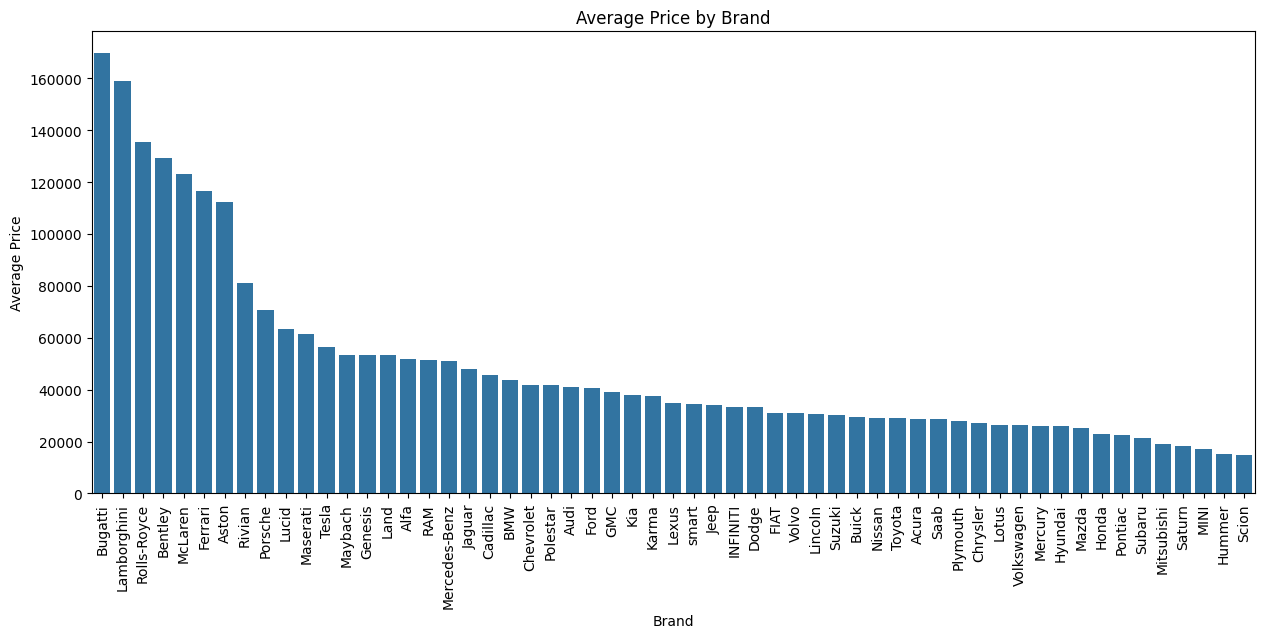

In [ ]:
brand_price = df_train.groupby('brand')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(x=brand_price.index, y=brand_price.values)
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.title('Average Price by Brand')
plt.xticks(rotation=90)
plt.show()

In [ ]:
def brand_encoder(brand):
    brand_mapping = {
        3: ['Bugatti', 'Lamborghini', 'Rolls-Royce', 'Bentley', 'McLaren', 'Ferrari', 'Aston'],
        2: ['Rivian', 'Porsche', 'Lucid', 'Maserati', 'Tesla', 'Maybach', 'Genesis', 'Land', 'Alfa', 'RAM', 'Mercedes-Benz', 'Jaguar', 'Cadillac', 'BMW'],
    }

    # Iterate through the mapping and return the  value
    for rating, brands in brand_mapping.items():
        if brand in brands:
            return rating

    # Return 1 if the brand isn't found in the mapping
    return 1

df_train['brand_encoded'] = df_train['brand'].apply(brand_encoder)
df_test['brand_encoded'] = df_test['brand'].apply(brand_encoder)


In [ ]:
print('encoded_train' ,df_train['brand_encoded'].unique())
print('encoded_test ' ,df_test ['brand_encoded'].unique())

encoded_train [1 2 3]
encoded_test  [2 1 3]


In [ ]:
## brand will be dropped after encoding it
df_train  = df_train.drop('brand', axis=1)
df_test  = df_test.drop('brand', axis=1)

In [ ]:
df_train['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', 'Electricity', 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

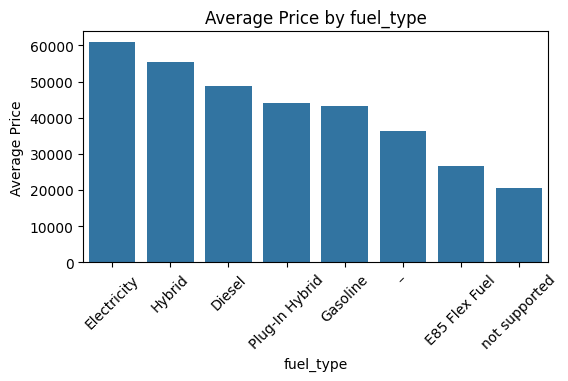

In [ ]:
fuel_price = df_train.groupby('fuel_type')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 3))
sns.barplot(x=fuel_price.index, y=fuel_price.values)
plt.xlabel('fuel_type')
plt.ylabel('Average Price')
plt.title('Average Price by fuel_type')
plt.xticks(rotation=45)
plt.show()

In [ ]:
## we will encode feul_types as we encoded brands before :
def fuel_encoder(fuel_type):
    fuel_mapping = {
        3: ['Electricity', 'Hybrid','Diesel' ],
        2:  ['Plug-In Hybrid','Gasoline','–'],
    }

    # Iterate through the mapping and return the  value
    for rating, types in fuel_mapping.items():
        if fuel_type in types:
            return rating

    # Return 1 if the brand isn't found in the mapping
    return 1

df_train['fuel_type'] = df_train['fuel_type'].apply(fuel_encoder)
df_test['fuel_type'] = df_test['fuel_type'].apply(fuel_encoder)

In [ ]:
print('encoded_train' ,df_train['fuel_type'].unique())
print('encoded_test ' ,df_test ['fuel_type'].unique())


encoded_train [2 1 3]
encoded_test  [2 3 1]


In [ ]:
df_train['engine']

,engine
0,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel
1,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel
2,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...
3,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel
4,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
...,...
188528,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel
188529,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel
188530,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel
188531,3.0L


In [ ]:
# we will use regular expressions (regex) to extract some features from it as :-
# [Horsepower,Displacement,Engine Type,Cylinder Count,Fuel Type] :
import re

def extract_hp(engine):
    match = re.search(r'(\d+(\.\d+)?)HP', engine)
    return float(match.group(1)) if match else None

def extract_displacement(engine):
    match = re.search(r'(\d+\.\d+)L|(\d+\.\d+) Liter', engine)
    return float(match.group(1)) if match else None

def extract_engine_type(engine):
    match = re.search(r'(V\d+|I\d+|Flat \d+|Straight \d+)', engine)
    return match.group(1) if match else None

def extract_cylinder_count(engine):
    match = re.search(r'(\d+) Cylinder', engine)
    return int(match.group(1)) if match else None

def extract_fuel_type(engine):
    fuel_types = ['Gasoline', 'Diesel', 'Electric', 'Hybrid', 'Flex Fuel']
    for fuel in fuel_types:
        if fuel in engine:
            return fuel
    return None

def extract_displacement(engine):
    match = re.search(r'(\d+\.\d+)L|(\d+\.\d+) Liter', engine)
    if match:
        return float(match.group(1)) if match.group(1) else float(match.group(2))
    return None

# Apply extraction functions on train & test :
df_train['Horsepower'] = df_train['engine'].apply(extract_hp)
df_train['Displacement'] = df_train['engine'].apply(extract_displacement)
df_train['Engine Type'] = df_train['engine'].apply(extract_engine_type)
df_train['Cylinder Count'] = df_train['engine'].apply(extract_cylinder_count)
df_train['Fuel Type'] = df_train['engine'].apply(extract_fuel_type)


df_test['Horsepower'] = df_test['engine'].apply(extract_hp)
df_test['Displacement'] = df_test['engine'].apply(extract_displacement)
df_test['Engine Type'] = df_test['engine'].apply(extract_engine_type)
df_test['Cylinder Count'] = df_test['engine'].apply(extract_cylinder_count)
df_test['Fuel Type'] = df_test['engine'].apply(extract_fuel_type)

In [ ]:
# handel null values in Horse Power and Cylinder count with mean :

df_train['Horsepower'].fillna(df_train['Horsepower'].mean(), inplace=True)
df_train['Cylinder Count'].fillna(df_train['Cylinder Count'].mean(), inplace=True)

df_test['Horsepower'].fillna(df_test['Horsepower'].mean(), inplace=True)
df_test['Cylinder Count'].fillna(df_test['Cylinder Count'].mean(), inplace=True)

In [ ]:
df_train.head()

,id,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,brand_encoded,Horsepower,Displacement,Engine Type,Cylinder Count,Fuel Type
0,0,2007,213000,2,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,1,172.0,1.6,None,4.0,Gasoline
1,1,2002,143250,2,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,1,252.0,3.9,None,8.0,Gasoline
2,2,2002,136731,1,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,1,320.0,5.3,None,8.0,Flex Fuel
3,3,2017,19500,2,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,2,420.0,5.0,None,8.0,Gasoline
4,4,2021,7388,2,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,2,208.0,2.0,None,4.0,Gasoline


In [ ]:
df_train.drop(['engine','Fuel Type'], axis=1, inplace=True)
df_test.drop(['engine','Fuel Type'], axis=1, inplace=True)

In [ ]:
df_train['Engine Type'].isnull().sum()

99563

In [ ]:
## as (Engine Type) has more than 60% null values of all values , so will be dropped :
df_train.drop(['Engine Type'], axis=1, inplace=True)
df_test.drop(['Engine Type'], axis=1, inplace=True)

In [ ]:
## transmission feature :
df_train['transmission'].unique()

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T', '6-Speed A/T',
       '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic',
       '9-Speed Automatic', '5-Speed A/T', 'Automatic',
       '7-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '5-Speed M/T', 'M/T', '6-Speed M/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '6-Speed Manual', 'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',


In [ ]:
'''
transmission_map = {
    'manual': 'Manual',
    'm/t': 'Manual',
    'automatic': 'Automatic',
    'a/t': 'Automatic',
    'cvt': 'CVT'
}
'''
def clean_transmission(value):
    value = value.strip().lower()  # Convert to lowercase and strip whitespace
    if 'manual' in value or 'm/t' in value:
        return 'Manual'
    elif 'automatic' in value or 'a/t' in value or 'cvt' in value:
        return 'Automatic'

    else:
        return 'Other'

# Apply the cleaning function
df_train['transmission'] = df_train['transmission'].apply(clean_transmission)
df_test['transmission'] = df_test['transmission'].apply(clean_transmission)

df_train['transmission'].unique()

array(['Automatic', 'Other', 'Manual'], dtype=object)

In [ ]:
df_train.head(3)

,id,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,brand_encoded,Horsepower,Displacement,Cylinder Count
0,0,2007,213000,2,Automatic,Yellow,Gray,None reported,Yes,4200,1,172.0,1.6,4.0
1,1,2002,143250,2,Automatic,Silver,Beige,At least 1 accident or damage reported,Yes,4999,1,252.0,3.9,8.0
2,2,2002,136731,1,Automatic,Blue,Gray,None reported,Yes,13900,1,320.0,5.3,8.0


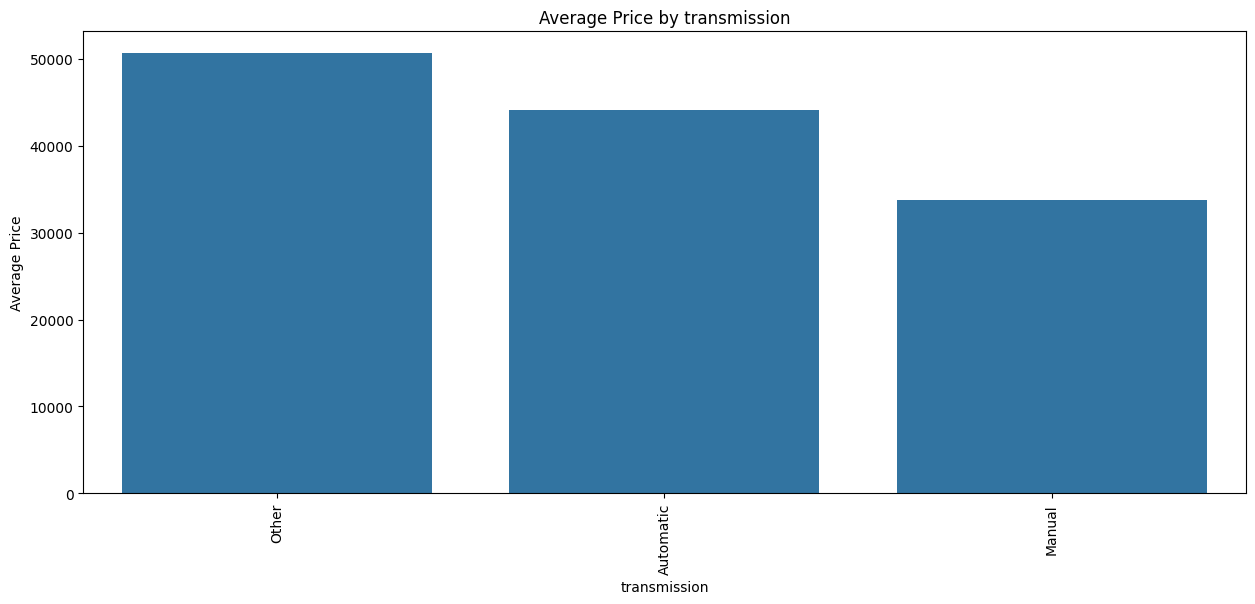

In [ ]:
# transmission will be encoded based on price :-
transmission_price = df_train.groupby('transmission')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(x=transmission_price.index, y=transmission_price.values)
plt.xlabel('transmission')
plt.ylabel('Average Price')
plt.title('Average Price by transmission')
plt.xticks(rotation=90)
plt.show()

In [ ]:
def transmission_encoder(transmission):
  if transmission in ['Other' ]:
    return 3
  elif transmission in ['Automatic']:
    return 2
  else:
    return 1

df_train['transmission'] = df_train['transmission'].apply(transmission_encoder)
df_test ['transmission'] = df_test ['transmission'].apply(transmission_encoder)

In [ ]:
df_train.head(3)

,id,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,brand_encoded,Horsepower,Displacement,Cylinder Count
0,0,2007,213000,2,2,Yellow,Gray,None reported,Yes,4200,1,172.0,1.6,4.0
1,1,2002,143250,2,2,Silver,Beige,At least 1 accident or damage reported,Yes,4999,1,252.0,3.9,8.0
2,2,2002,136731,1,2,Blue,Gray,None reported,Yes,13900,1,320.0,5.3,8.0


In [ ]:
df_train['ext_col'].nunique()

319

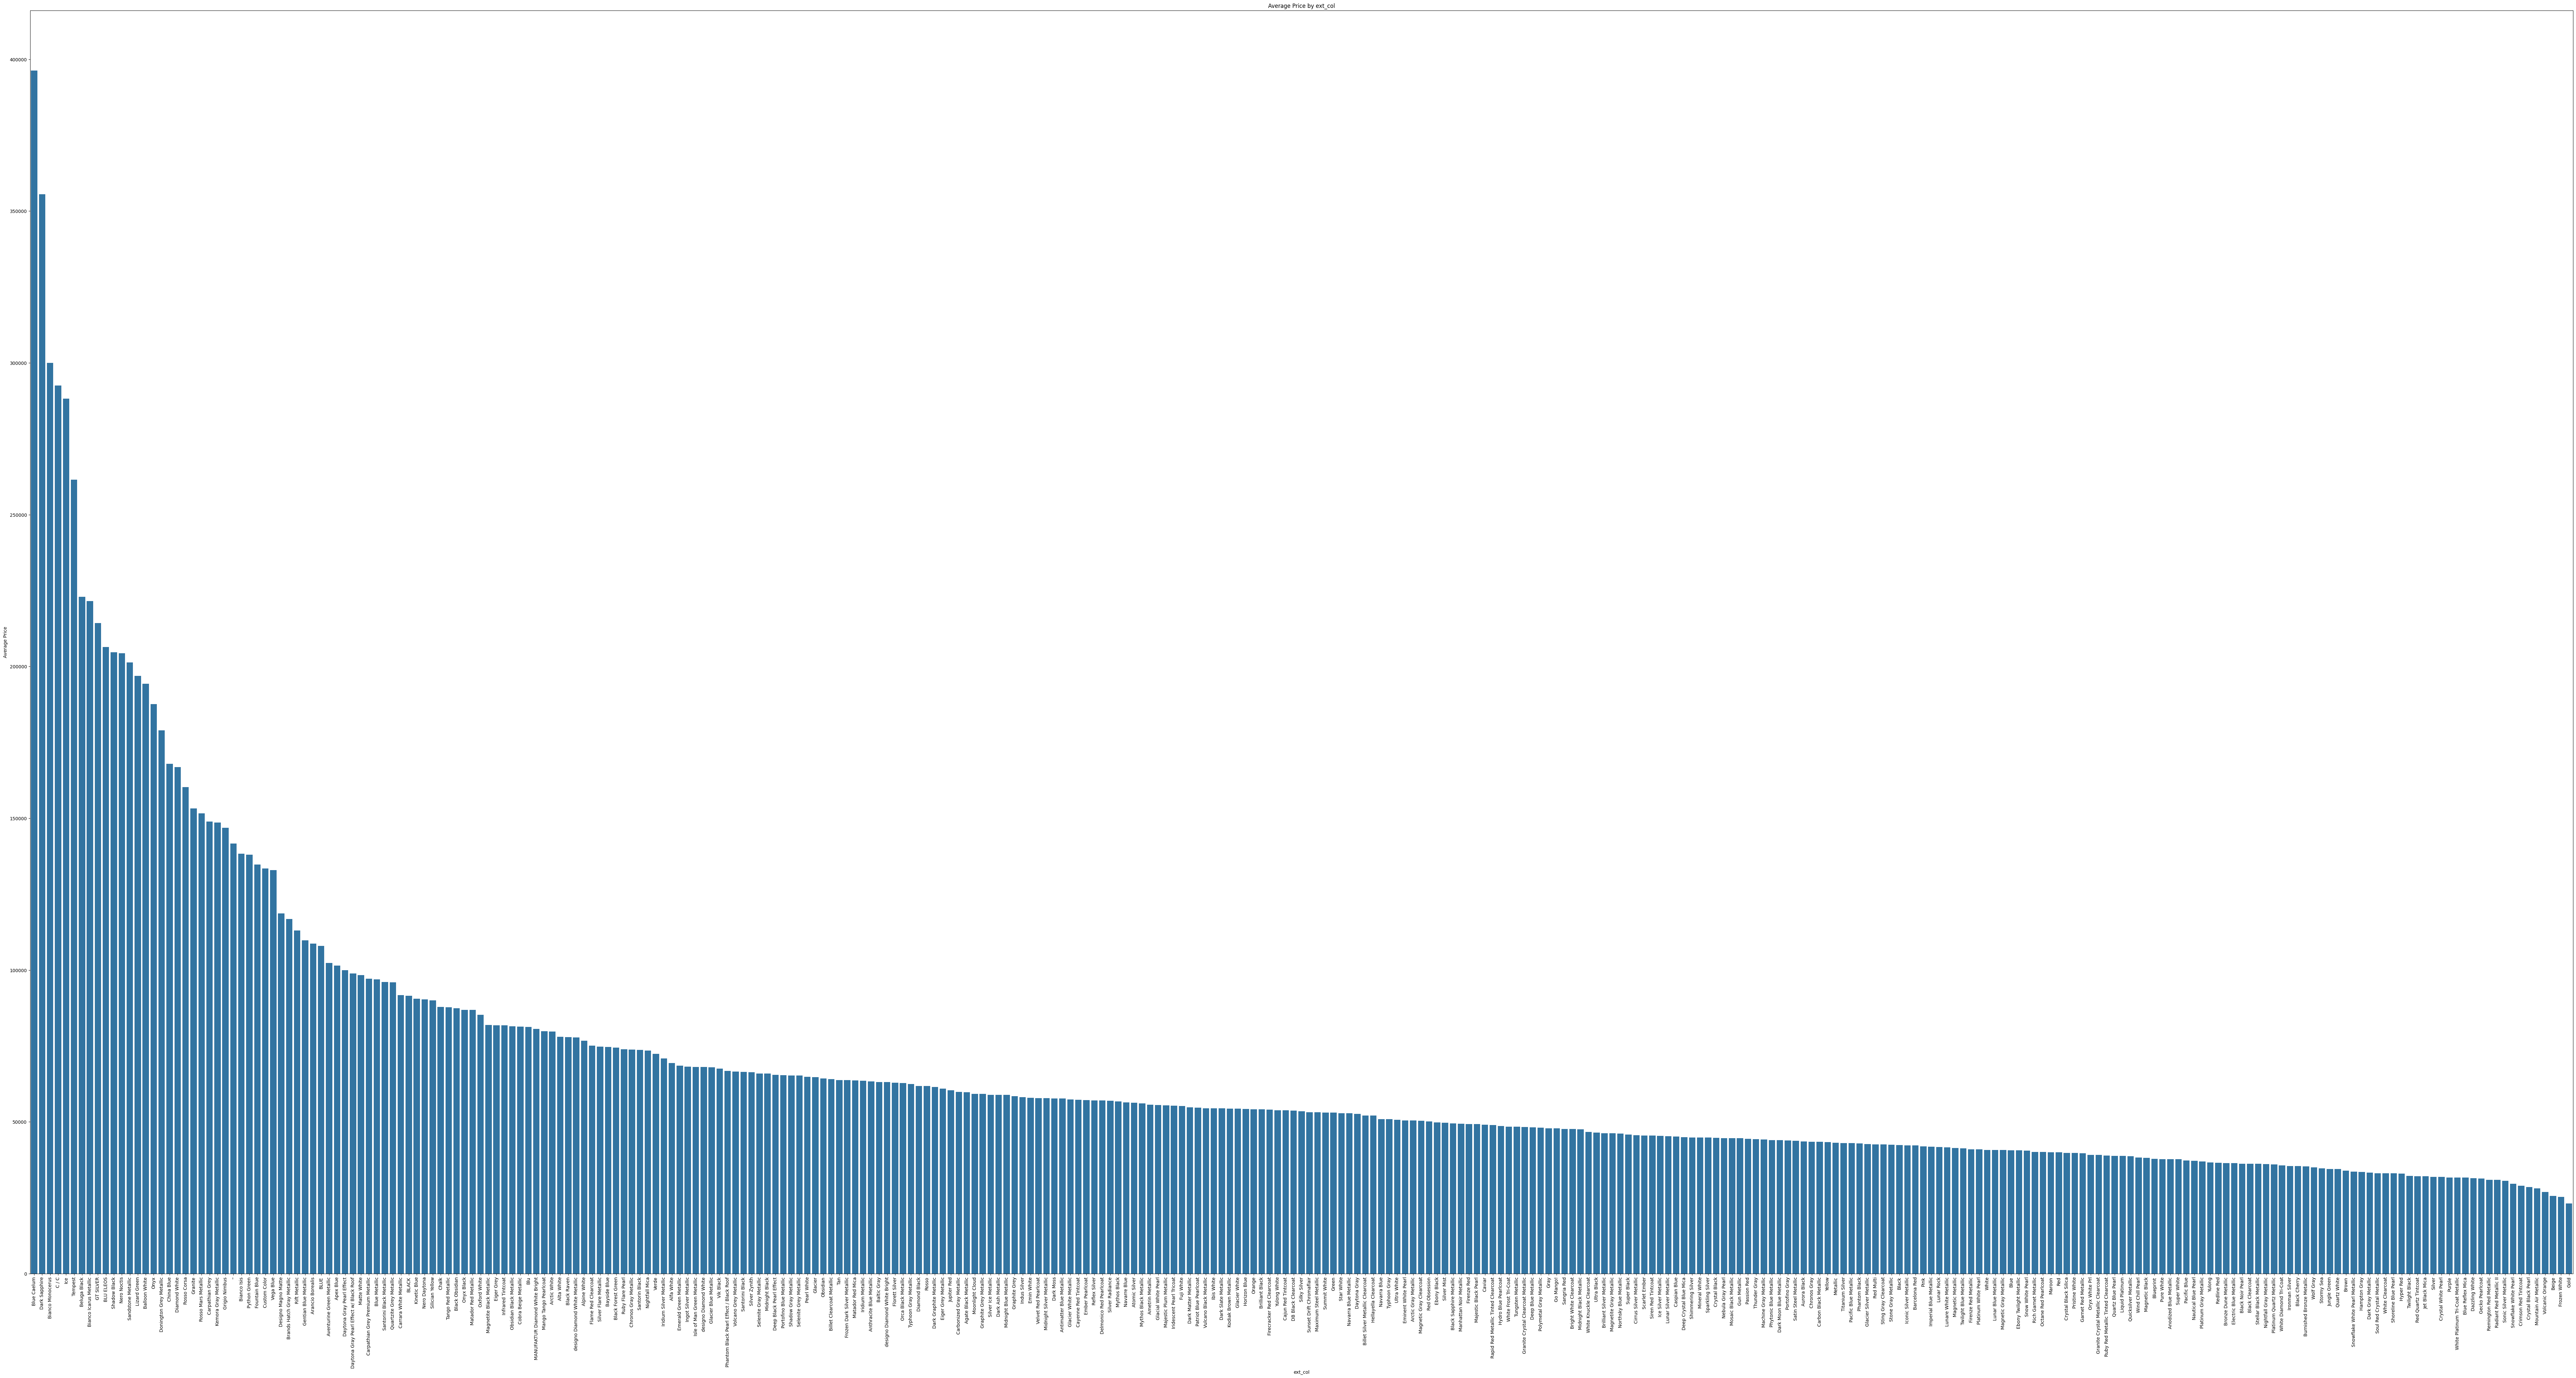

In [ ]:
ext_col_price = df_train.groupby('ext_col')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(100,50))
sns.barplot(x=ext_col_price.index, y=ext_col_price.values)
plt.xlabel('ext_col')
plt.ylabel('Average Price')
plt.title('Average Price by ext_col')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Calculate mean price per color and sort
ext_col_price = df_train.groupby('ext_col')['price'].mean().sort_values(ascending=False)

# color ranked based on its mean of price :
color_rank = {color: rank for rank, color in enumerate(ext_col_price.index, start=1)}

# Encode the colors
df_train['ext_col_encoded'] = df_train['ext_col'].map(color_rank)
df_test['ext_col_encoded'] = df_test['ext_col'].map(color_rank)

df_train.drop('ext_col', axis=1, inplace=True)
df_test.drop('ext_col', axis=1, inplace=True)

In [ ]:
print(df_train['ext_col_encoded'].isna().sum())
print(df_test['ext_col_encoded'].isna().sum())

0
0


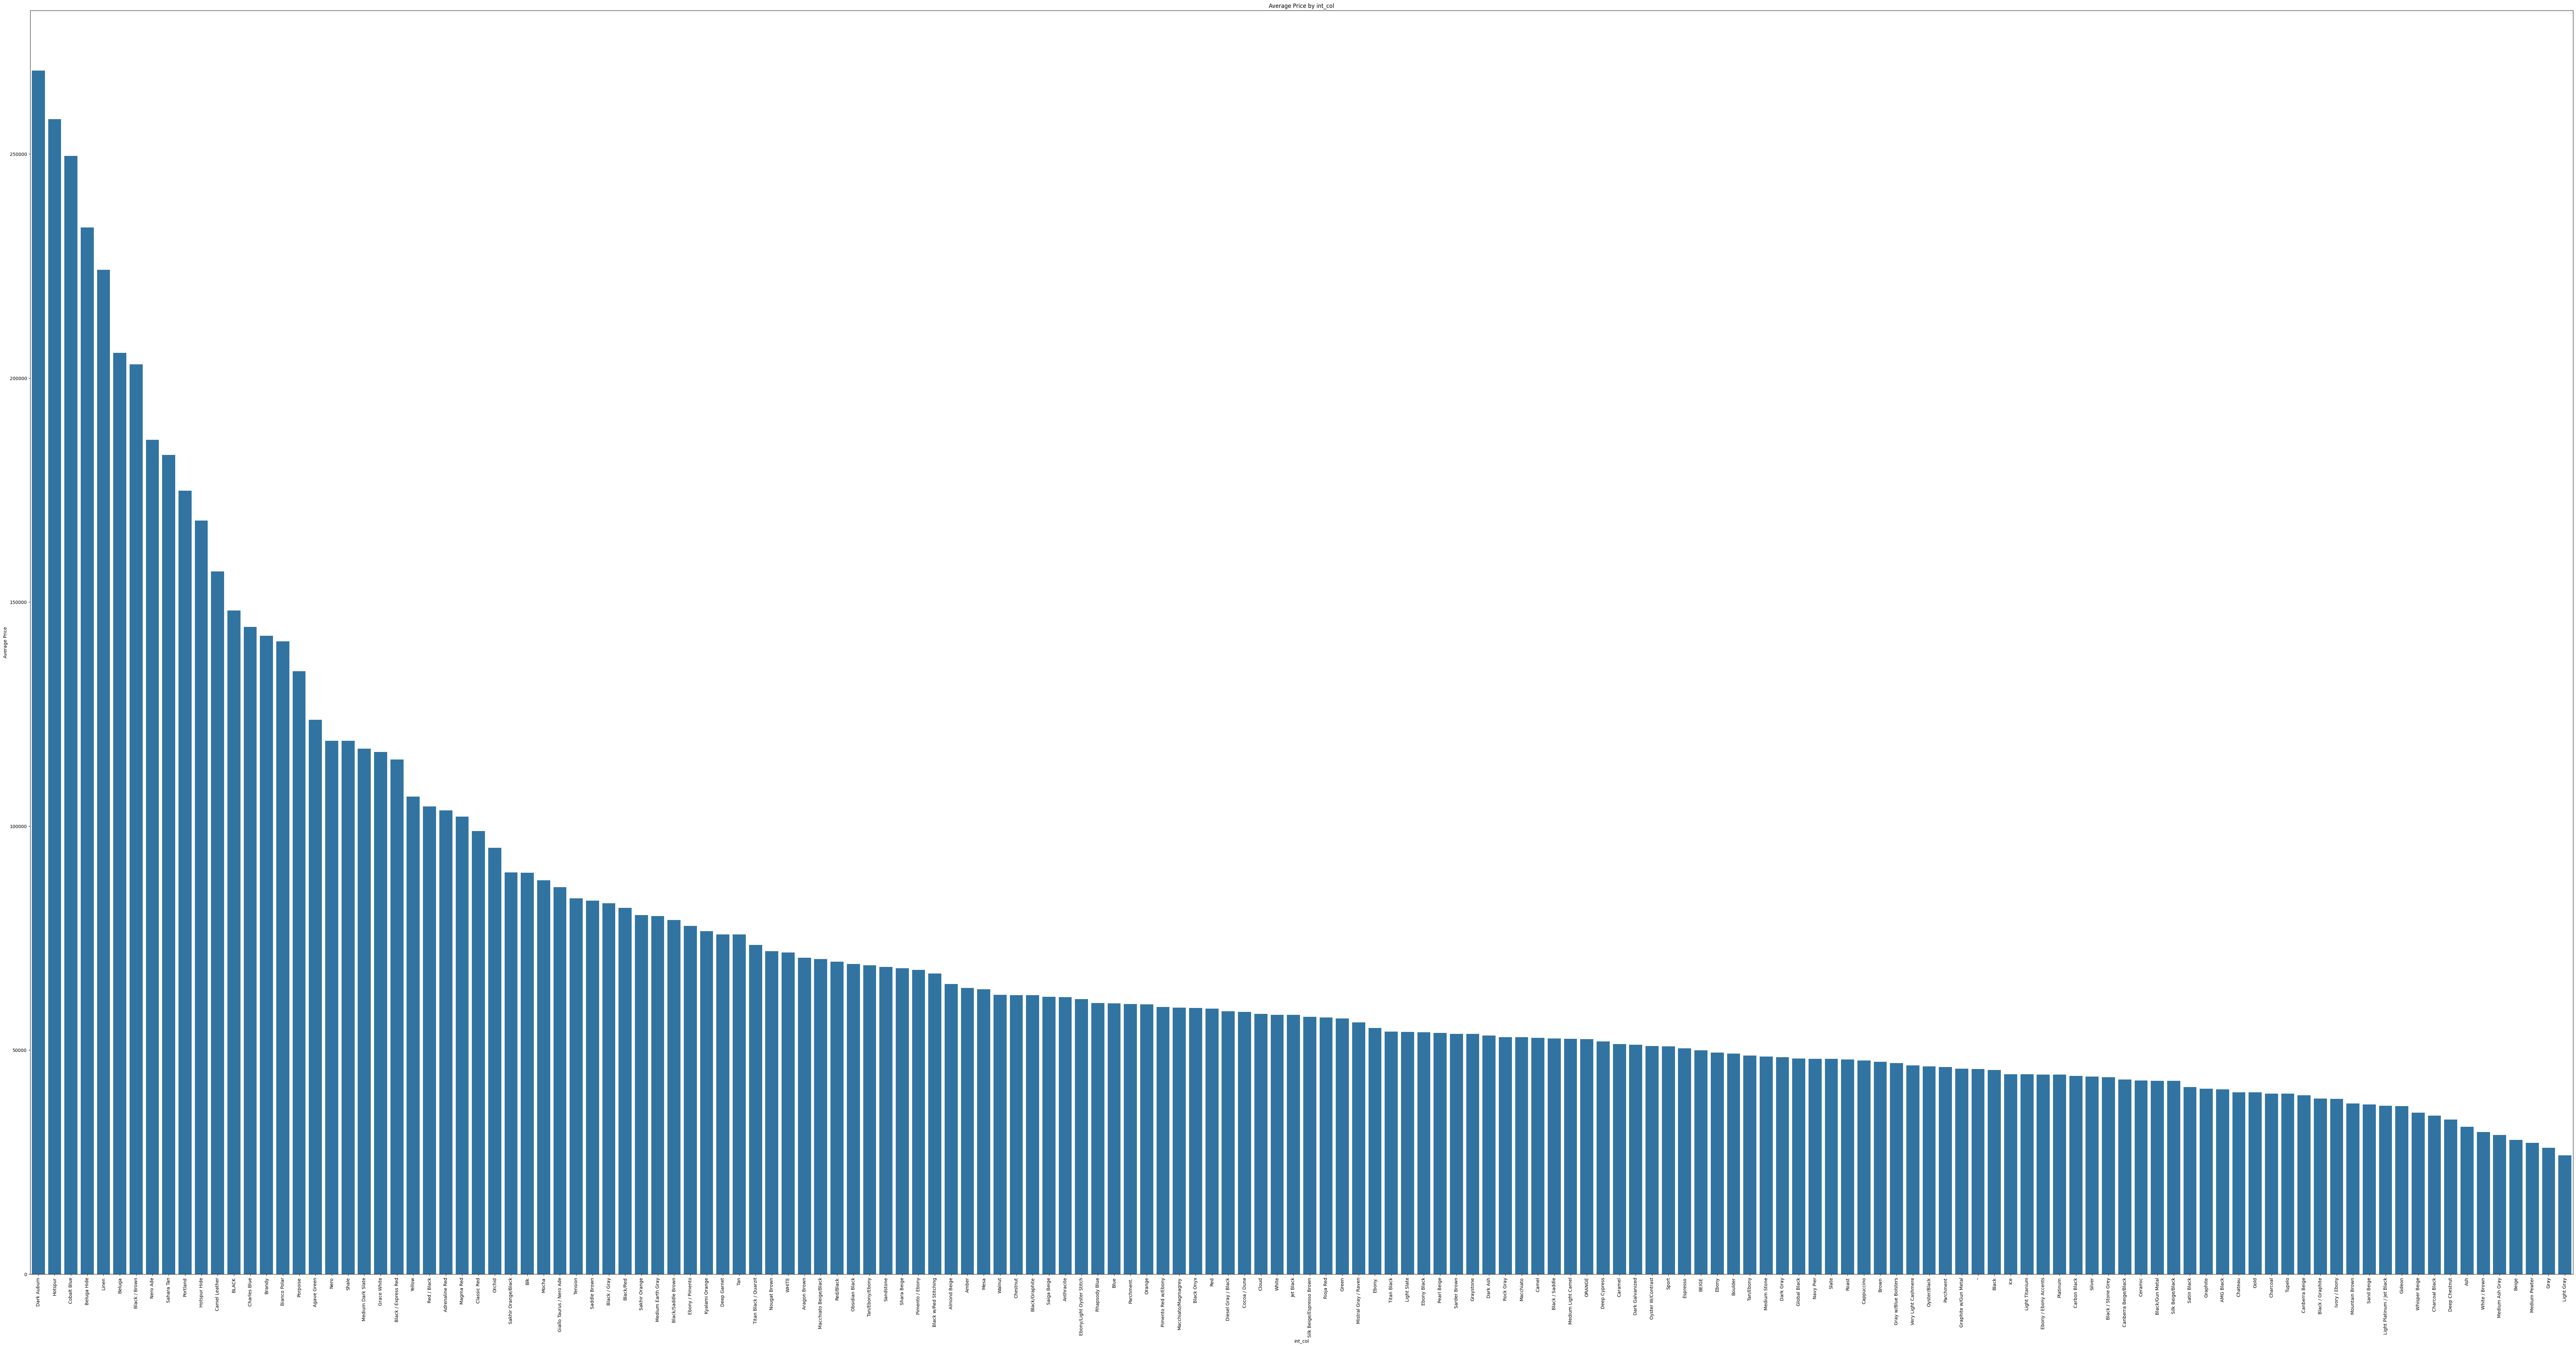

In [ ]:
## we will make the same steps on int_col as we did on ext_col :
int_col_price = df_train.groupby('int_col')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(100,50))
sns.barplot(x=int_col_price.index, y=int_col_price.values)
plt.xlabel('int_col')
plt.ylabel('Average Price')
plt.title('Average Price by int_col')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Arrange the colors from highest to lowest based on price , then encode it
int_col_price = df_train.groupby('int_col')['price'].mean().sort_values(ascending=False)

color_rank = {color: rank for rank, color in enumerate(int_col_price.index, 1)}

df_train['int_col_encoded'] = df_train['int_col'].map(color_rank)
df_test['int_col_encoded'] = df_test['int_col'].map(color_rank)

df_train.drop('int_col', axis=1, inplace=True)
df_test.drop('int_col', axis=1, inplace=True)

In [ ]:
print(df_train['int_col_encoded'].isna().sum())
print(df_test['int_col_encoded'].isna().sum())

0
0


In [ ]:
df_train.head(3)

,id,model_year,milage,fuel_type,transmission,accident,clean_title,price,brand_encoded,Horsepower,Displacement,Cylinder Count,ext_col_encoded,int_col_encoded
0,0,2007,213000,2,2,None reported,Yes,4200,1,172.0,1.6,4.0,226,155
1,1,2002,143250,2,2,At least 1 accident or damage reported,Yes,4999,1,252.0,3.9,8.0,302,153
2,2,2002,136731,1,2,None reported,Yes,13900,1,320.0,5.3,8.0,249,155


In [ ]:
## accident feature :
df_train['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported'],
      dtype=object)

In [ ]:
# Define a mapping for the accident types
accident_mapping = {
    'None reported': 0,
    'At least 1 accident or damage reported': 1
}

# Apply the encoding
df_train['accident_encoded'] = df_train['accident'].map(accident_mapping)
df_test['accident_encoded'] = df_test['accident'].map(accident_mapping)


In [ ]:
print(df_train['accident'].isna().sum())
print(df_test ['accident'].isna().sum())

0
0


In [ ]:
df_train.drop('accident', axis=1, inplace=True)
df_test.drop('accident', axis=1, inplace=True)

In [ ]:
# clean_title feature :
df_train['clean_title'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
def clean_title_encoder(clean_title):
  if clean_title in ['Yes']:
    return 1
  elif clean_title in ['No']:
    return 0

df_train['clean_title'] = df_train['clean_title'].apply(clean_title_encoder)
df_test['clean_title'] = df_test['clean_title'].apply(clean_title_encoder)

In [ ]:
df_train.head(3)


,id,model_year,milage,fuel_type,transmission,clean_title,price,brand_encoded,Horsepower,Displacement,Cylinder Count,ext_col_encoded,int_col_encoded,accident_encoded
0,0,2007,213000,2,2,1,4200,1,172.0,1.6,4.0,226,155,0
1,1,2002,143250,2,2,1,4999,1,252.0,3.9,8.0,302,153,1
2,2,2002,136731,1,2,1,13900,1,320.0,5.3,8.0,249,155,0


In [ ]:
(df_train['model_year'].unique())

array([2007, 2002, 2017, 2021, 2018, 2016, 2020, 2015, 2011, 2013, 2023,
       2019, 2012, 2014, 2008, 2009, 2022, 2003, 2005, 2001, 2006, 2000,
       2010, 2004, 1997, 1998, 1999, 1994, 1993, 1996, 1995, 2024, 1974,
       1992])

In [ ]:
#  replace model_year column with the age of the car as (model_age) :-

current_year = 2024

df_train['model_age'] = current_year - df_train['model_year']
df_test['model_age'] = current_year - df_test['model_year']

df_train.drop('model_year', axis=1, inplace=True)
df_test.drop('model_year', axis=1, inplace=True)

###**Exploratory Data Analysis (EDA)**

In [ ]:
cat_cols = [x for x in df_train.columns if df_train[x].dtype == 'object']
num_cols = [x for x in df_train.columns if df_train[x].dtype != 'object']
print('Categorical : ',cat_cols)
print('Numerical : ',num_cols)

Categorical :  []
Numerical :  ['id', 'milage', 'fuel_type', 'transmission', 'clean_title', 'price', 'brand_encoded', 'Horsepower', 'Cylinder Count', 'ext_col_encoded', 'int_col_encoded', 'accident_encoded', 'model_age']


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'milage'}>,
        <Axes: title={'center': 'fuel_type'}>,
        <Axes: title={'center': 'transmission'}>],
       [<Axes: title={'center': 'clean_title'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'brand_encoded'}>,
        <Axes: title={'center': 'Horsepower'}>],
       [<Axes: title={'center': 'Cylinder Count'}>,
        <Axes: title={'center': 'ext_col_encoded'}>,
        <Axes: title={'center': 'int_col_encoded'}>,
        <Axes: title={'center': 'accident_encoded'}>],
       [<Axes: title={'center': 'model_age'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

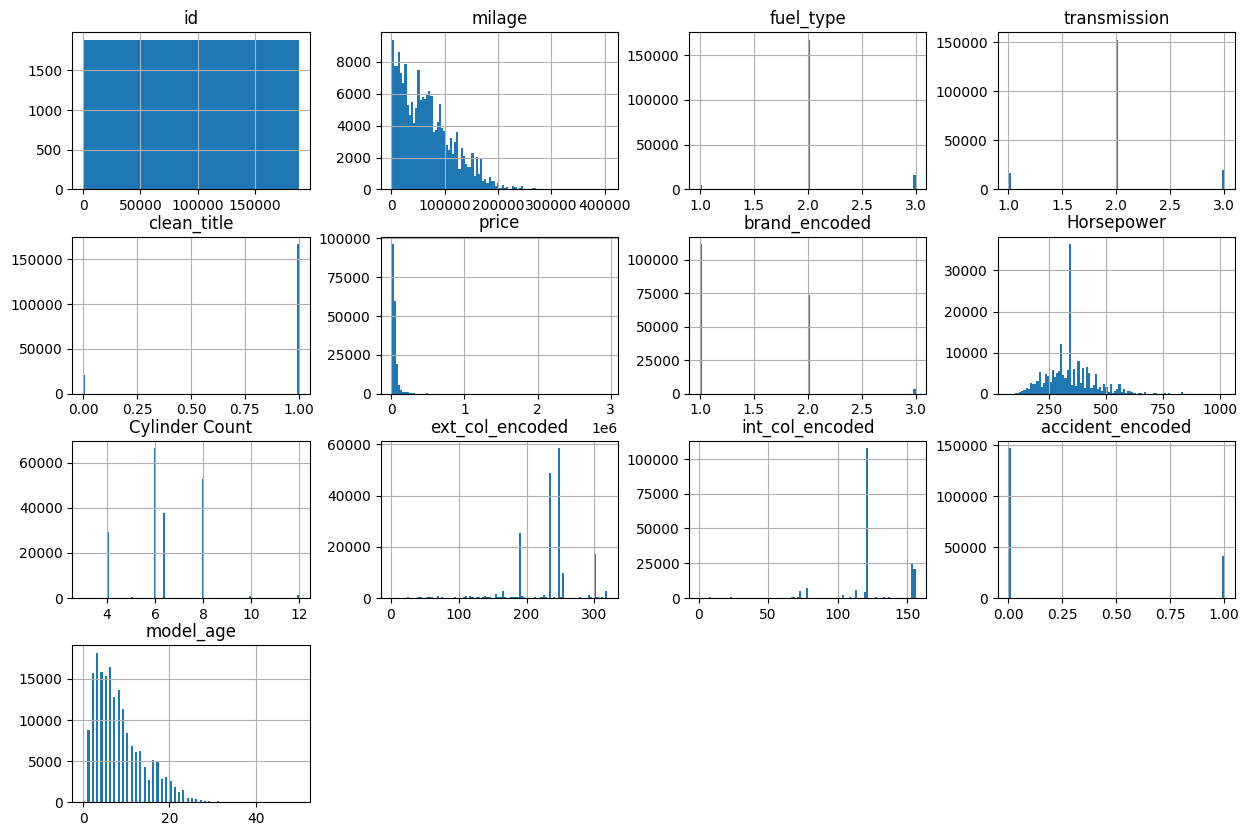

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df_train[num_cols].hist(bins = 100, figsize = (15, 10))

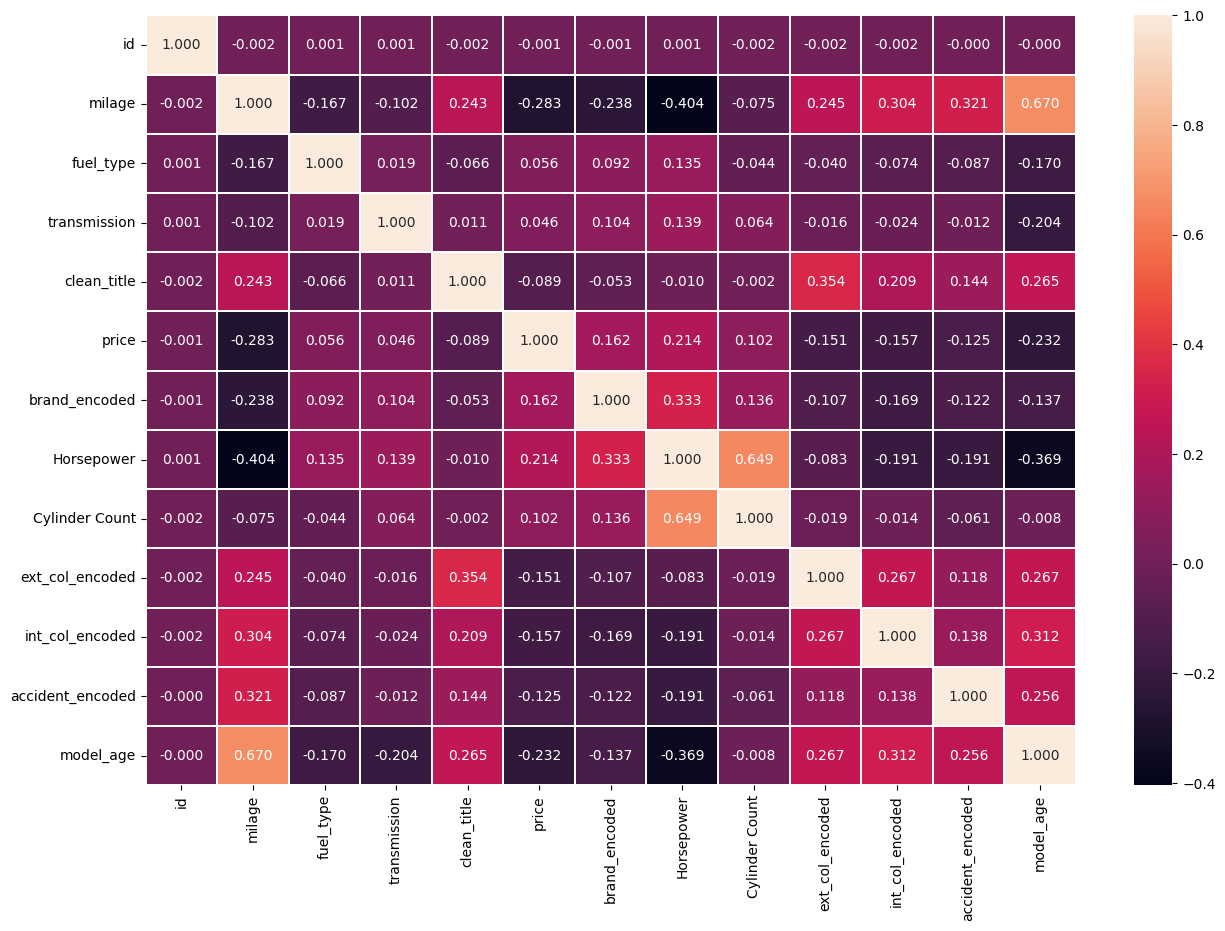

In [ ]:
corr_matrix = df_train[num_cols].corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(15, 10))
sns.heatmap(corr_matrix,
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values,
            linewidth=0.1,
            annot=True,  # This will show the correlation values on the graph
            fmt=".3f")
plt.show()

In [ ]:
# we droped (Displacement) as it was high_corr with (Cylinder Count)
df_train.drop('Displacement', axis=1, inplace=True)
df_test.drop('Displacement', axis=1, inplace=True)

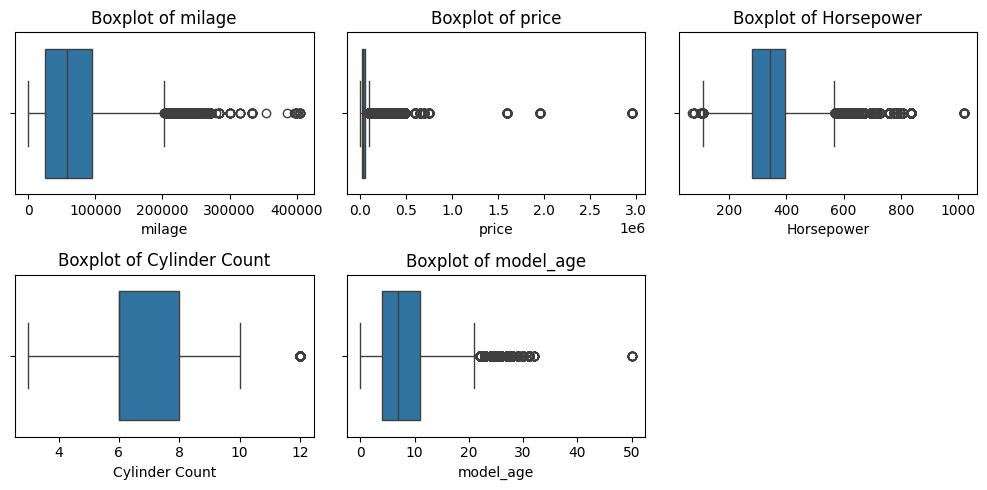

In [ ]:
##
num_cols = ['milage', 'price', 'Horsepower', 'Cylinder Count', 'model_age']

# Set up the matplotlib figure
plt.figure(figsize=(10, 5))

# Loop through the numerical columns to create boxplots
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)  # Create a grid of subplots (2 rows, 3 columns)
    sns.boxplot(x=df_train[col])
    plt.title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# create csv files for new df_train and df_test
df_train.to_csv('df_train_processed2.csv', index=False)
df_test.to_csv('df_test_processed2.csv', index=False)

In [ ]:
df_train.drop(['id'], axis=1, inplace=True)
df_test.drop(['id'], axis=1, inplace=True)

In [ ]:
# ## Downloading the (df_train) file after preprocessing
# from google.colab import files
# files.download('df_train_processed2.csv')

In [ ]:
x = df_train.drop(['price'], axis=1)
y = df_train['price']

In [ ]:
df_train.columns

Index(['id', 'milage', 'fuel_type', 'transmission', 'clean_title', 'price',
       'brand_encoded', 'Horsepower', 'Cylinder Count', 'ext_col_encoded',
       'int_col_encoded', 'accident_encoded', 'model_age'],
      dtype='object')

id                   0.000000
milage               0.895062
fuel_type            1.015777
transmission         0.094032
clean_title         -2.435242
price               20.268453
brand_encoded        0.659013
Horsepower           0.859974
Cylinder Count       0.168092
ext_col_encoded     -1.539357
int_col_encoded     -1.238950
accident_encoded     1.348519
model_age            1.044511
dtype: float64


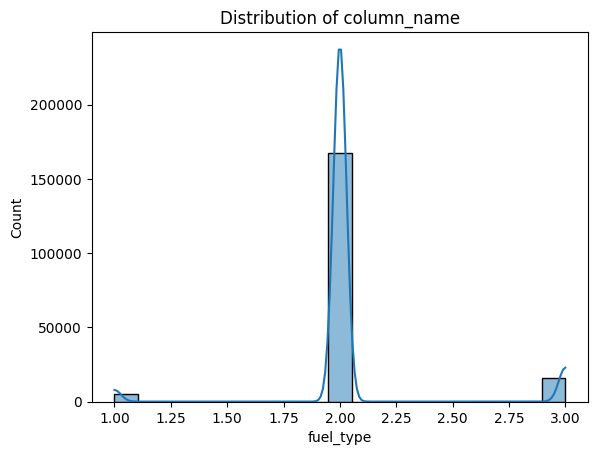

In [ ]:

# Check the skewness for numerical columns
skewness = df_train.skew()

# Print the skewness values
print(skewness)

# Optionally visualize the distribution of a specific column
sns.histplot(df_train['fuel_type'], kde=True)
plt.title('Distribution of column_name')
plt.show()


###**Modeling**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

***LinearRegression***

In [ ]:
model1 = LinearRegression()

In [ ]:
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"R-squared: {r2:.6f}")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")

R-squared: 0.119536
Mean Squared Error (MSE): 4896381178.187447
Root Mean Squared Error (RMSE): 69974.146498
Mean Absolute Error (MAE): 23257.986219


In [ ]:
y_pred = model1.predict(df_test)

df_submission['price'] = y_pred

df_submission.to_csv('submission2.csv', index=False)

***XGBRegressor***

In [ ]:
model2 = xgb.XGBRegressor()

In [ ]:
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"R-squared: {r2:.6f}")
print(f"Mean Squared Error (MSE): {mse:.6f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.6f}")
print(f"Mean Absolute Error (MAE): {mae:.6f}")

R-squared: 0.076129
Mean Squared Error (MSE): 5137773672.505373
Root Mean Squared Error (RMSE): 71678.264994
Mean Absolute Error (MAE): 20395.526138


**GUI**

In [ ]:
import gradio as gr
import pandas as pd

# Assuming df_train contains your processed dataset with car models, brand, model_age, and price
df_train = pd.read_csv('df_train_processed2.csv')  # Load the preprocessed training data

# Define the function to suggest cars based on the user's budget
def suggest_car(budget):
    # Filter the dataframe for cars under the given budget
    filtered_cars = df_train[df_train['price'] <= budget]

    # Sort by price (ascending) and select top 5 cars within the budget
    if not filtered_cars.empty:
        top_cars = filtered_cars[['brand_encoded', 'model_age', 'price']].sort_values(by='price').head(5)
        # Convert the dataframe to a string to display as output
        return top_cars.to_string(index=False)
    else:
        return "Sorry, no cars found within this budget."

# Create the Gradio Interface
demo = gr.Interface(
    fn=suggest_car,
    inputs=gr.Number(label="Enter your Budget ($)"),
    outputs="text",
    title="Car Model Suggestions Based on Budget",
    description="Enter your budget and we'll recommend the best car models for you."
)

# Launch the Gradio interface
demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://4f6b35110e5c7c0328.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
